In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [352]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'C:\\Users\\asus\\Documents\\GitHub\\ML_course\\projects\\project1\\data\\train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

In [329]:
from implementations import *

In [394]:
#Normalize the data
centered_data = tX - np.mean(tX, axis=0)
tX = centered_data / np.std(centered_data, axis=0)
y[y == -1] = 0

In [9]:
#Find the correlations btw all columns and delete rows that are highly correlated
corr_mtx = np.identity(30)
for i in range(31):
    for j in range(i,30):
        corr_mtx[i,j] = np.corrcoef(tX[:,i], tX[:,j])[0,1]
        if corr_mtx[i,j]>0.95 and i!=j:
            print(i,j)

4 6
4 12
4 26
4 27
4 28
6 12
6 26
6 27
6 28
9 29
12 26
12 27
12 28
23 24
23 25
24 25
26 27
26 28
27 28


In [395]:
tX = np.delete(tX, np.array([6, 12,24,25,26,27,28,29]), axis=1)

In [19]:
least_squares_GD(y, tX, np.ones(tX.shape[1]), 50, 0.3)

(array([ 4.74321259e-02, -1.53963212e-01, -1.37635737e-01,  1.33744517e-01,
         8.92468835e-02,  2.69903296e-01,  7.71949367e-02,  6.08511647e-02,
         4.22754698e-02,  1.54108065e-03,  1.38481014e-01,  2.28383070e-01,
         4.78779208e-04,  1.48033753e-04,  1.33319320e-01,  1.64120780e-03,
         9.00020726e-04,  1.25322046e-01,  1.80818705e-03,  8.89206402e-02,
         1.77560082e-02,  1.94047648e-01]), 1.1321964278920882)

0.7908063419107262

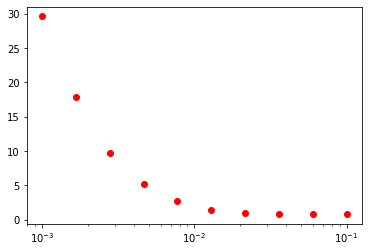

In [112]:
num_gamma = 10
least_squares_loss = np.ones(num_gamma)
gamma = np.logspace(-3, -1, num_gamma)
for i in range(num_gamma):
    least_squares_loss[i] = least_squares_GD(y, tX, np.ones(tX.shape[1]), 100, gamma[i])[1]
plt.plot(gamma, least_squares_loss, 'ro')
plt.xscale('log')
np.min(least_squares_loss)

In [25]:
least_squares_SGD(y, tX, np.ones(tX.shape[1]), 200, 0.3)

(array([-3.42260631e+34, -1.56892392e+34,  1.11692532e+33, -1.01105676e+34,
        -1.47475725e+34, -1.83958195e+34, -1.24923547e+34, -2.70861613e+34,
        -2.75650459e+33, -1.72656273e+34,  8.23230393e+32,  1.36477822e+34,
         9.60312588e+33,  4.72936323e+34, -4.80695730e+32, -4.90785099e+33,
        -3.70255488e+33,  6.09239644e+33, -4.55661311e+34, -6.38359525e+33,
         1.74826370e+34,  5.48385517e+34]), 9.360435263520729e+69)

1.03736747240533

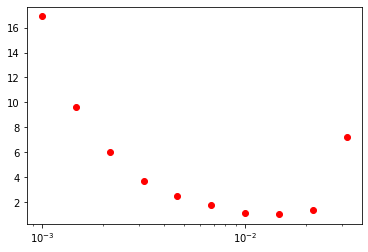

In [116]:
num_gamma = 10
least_squares_loss_SG = np.ones(num_gamma)
gamma = gamma = np.logspace(-3, -1.5, num_gamma)
for i in range(num_gamma):
    least_squares_loss_SG[i] = least_squares_SGD(y, tX, np.ones(tX.shape[1]), 1, 200, gamma[i])[1]
plt.plot(gamma, least_squares_loss_SG, 'ro')
plt.xscale('log')
np.min(least_squares_loss_SG)

In [21]:
least_squares(y, tX)

(array([ 0.01457775, -0.12673899, -0.12745413, -0.01694001, -0.08993026,
         0.20927023,  0.13388932, -0.00050725, -0.07308316, -0.09132203,
         0.05763819,  0.11023857, -0.00032171, -0.00054586,  0.15797759,
        -0.00043332,  0.0012556 ,  0.06044576,  0.00050283, -0.03165107,
        -0.09071907,  0.07996976]), 0.2874446446975829)

In [32]:
ridge_regression(y, tX, 0.02)

(array([ 0.02074855, -0.11421443, -0.0920186 , -0.00077868, -0.04247097,
         0.13761996,  0.10431579, -0.00810759, -0.03863204, -0.06988994,
         0.05813532,  0.09582814, -0.00044968, -0.00074823,  0.10749807,
        -0.00036194,  0.00119516,  0.04380157,  0.00059088, -0.03638813,
        -0.06717489,  0.05004489]), 0.29064121270803794)

0.7791136192054087

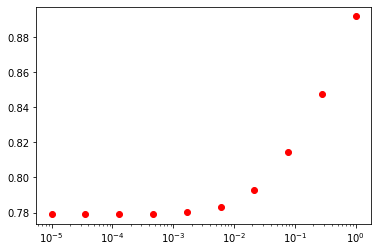

In [121]:
num_lambda = 10
ridge_regression_loss = np.ones(num_lambda)
lambda_ =  np.logspace(-5, 0, num_lambda)
for i in range(num_lambda):
    ridge_regression_loss[i] = ridge_regression(y, tX, lambda_[i])[1]
plt.plot(lambda_, ridge_regression_loss, 'ro')
plt.xscale('log')
np.min(ridge_regression_loss)

In [499]:
from implementations import *

In [480]:
logistic_regression(y[0:100000], tX[0:100000], np.ones(tX.shape[1]), 1000, 0.0001)

Current iteration=0, loss=409168.71375900134
Current iteration=100, loss=259661.64307601092
Current iteration=200, loss=250909.29467610808
Current iteration=300, loss=249660.3928674464
Current iteration=400, loss=249340.23067341623
Current iteration=500, loss=249204.05554446758
Current iteration=600, loss=249130.8016656185
Current iteration=700, loss=249088.00253290066
Current iteration=800, loss=249062.25859818218
Current iteration=900, loss=249046.60003717314


(array([-3.60446348e+00,  1.96926812e-01, -2.15826957e+00, -4.46604267e+00,
         1.40608197e+00, -5.55654964e+00,  8.70871595e+00,  4.54977904e+00,
        -5.82029376e-01, -6.29695869e+00, -3.01791372e+00,  2.04583284e-01,
         3.59812761e+00, -8.27487380e-02, -5.82708672e-02,  4.64965810e+00,
         5.02021133e-02,  1.05027340e-02,  3.59502993e-01,  7.92968798e-04,
        -1.33504781e+00, -6.67114059e+00,  4.16440358e+00]),
 172908.09636647173)

In [510]:
reg_logistic_regression(y[0:100000], tX[0:100000], 0.01, np.zeros(tX.shape[1]),  1000, 0.0001)

Current iteration=0, loss=164952.41103314853
Current iteration=100, loss=259676.09809788057
Current iteration=200, loss=250914.86226705337
Current iteration=300, loss=249670.70296814412
Current iteration=400, loss=249349.86114789054
Current iteration=500, loss=249212.78358124822
Current iteration=600, loss=249138.93097647783
Current iteration=700, loss=249095.765511881


KeyboardInterrupt: 

Current iteration=0, loss=964.2367369147704
Current iteration=100, loss=961.7540669696082
Current iteration=200, loss=959.2956538193378
Current iteration=300, loss=956.8610888213825
Current iteration=400, loss=954.4499727797551
Current iteration=500, loss=952.0619157057325
Current iteration=600, loss=949.696536581366
Current iteration=700, loss=947.3534631263026
Current iteration=800, loss=945.0323315683256
Current iteration=900, loss=942.7327864179689
Current iteration=1000, loss=940.4544802474795
Current iteration=1100, loss=938.1970734743845
Current iteration=1200, loss=935.9602341498463
Current iteration=1300, loss=933.7436377519559
Current iteration=1400, loss=931.5469669840771
Current iteration=1500, loss=929.3699115783187
Current iteration=1600, loss=927.2121681041768
Current iteration=1700, loss=925.0734397823744
Current iteration=1800, loss=922.953436303878
Current iteration=1900, loss=920.8518736540797
Current iteration=2000, loss=918.7684739420897
Current iteration=2100, los

Current iteration=8400, loss=771.5367178108506
Current iteration=8500, loss=770.0312326724377
Current iteration=8600, loss=768.5375127327555
Current iteration=8700, loss=767.0554241771335
Current iteration=8800, loss=765.5848358133655
Current iteration=8900, loss=764.1256190004729
Current iteration=9000, loss=762.6776475794893
Current iteration=9100, loss=761.2407978062123
Current iteration=9200, loss=759.8149482858719
Current iteration=9300, loss=758.3999799096568
Current iteration=9400, loss=756.9957757930567
Current iteration=9500, loss=755.6022212159642
Current iteration=9600, loss=754.2192035644919
Current iteration=9700, loss=752.8466122744614
Current iteration=9800, loss=751.4843387765097
Current iteration=9900, loss=750.132276442781
Current iteration=0, loss=964.21070577544
Current iteration=100, loss=959.1639591769092
Current iteration=200, loss=954.2167150623317
Current iteration=300, loss=949.3656116241408
Current iteration=400, loss=944.6074431240954
Current iteration=500, 

Current iteration=7800, loss=684.1672879461838
Current iteration=7900, loss=682.3848962470918
Current iteration=8000, loss=680.6270278972186
Current iteration=8100, loss=678.8932983751699
Current iteration=8200, loss=677.1833306471992
Current iteration=8300, loss=675.4967549218095
Current iteration=8400, loss=673.8332084182472
Current iteration=8500, loss=672.1923351479675
Current iteration=8600, loss=670.5737857081951
Current iteration=8700, loss=668.9772170867708
Current iteration=8800, loss=667.4022924775205
Current iteration=8900, loss=665.8486811054354
Current iteration=9000, loss=664.3160580609967
Current iteration=9100, loss=662.8041041430254
Current iteration=9200, loss=661.3125057094721
Current iteration=9300, loss=659.8409545356132
Current iteration=9400, loss=658.3891476791391
Current iteration=9500, loss=656.9567873516744
Current iteration=9600, loss=655.5435807962803
Current iteration=9700, loss=654.1492401705439
Current iteration=9800, loss=652.773482434864
Current iterat

Current iteration=6800, loss=609.4517443762023
Current iteration=6900, loss=607.82803996338
Current iteration=7000, loss=606.2449516389831
Current iteration=7100, loss=604.7013065509223
Current iteration=7200, loss=603.1959684299336
Current iteration=7300, loss=601.7278364083552
Current iteration=7400, loss=600.2958438769351
Current iteration=7500, loss=598.8989573783051
Current iteration=7600, loss=597.5361755358693
Current iteration=7700, loss=596.2065280169417
Current iteration=7800, loss=594.9090745290414
Current iteration=7900, loss=593.6429038483119
Current iteration=8000, loss=592.4071328790876
Current iteration=8100, loss=591.2009057436635
Current iteration=8200, loss=590.0233929013716
Current iteration=8300, loss=588.8737902960869
Current iteration=8400, loss=587.7513185313227
Current iteration=8500, loss=586.6552220720946
Current iteration=8600, loss=585.5847684727527
Current iteration=8700, loss=584.5392476300073
Current iteration=8800, loss=583.5179710603877
Current iterati

Current iteration=5300, loss=567.0850706750023
Current iteration=5400, loss=565.8012355758251
Current iteration=5500, loss=564.5712939524619
Current iteration=5600, loss=563.3924626565494
Current iteration=5700, loss=562.262119026199
Current iteration=5800, loss=561.1777908513378
Current iteration=5900, loss=560.1371470049908
Current iteration=6000, loss=559.1379886947059
Current iteration=6100, loss=558.1782412914548
Current iteration=6200, loss=557.2559466962869
Current iteration=6300, loss=556.3692562077664
Current iteration=6400, loss=555.5164238558026
Current iteration=6500, loss=554.6958001698866
Current iteration=6600, loss=553.9058263519984
Current iteration=6700, loss=553.1450288265312
Current iteration=6800, loss=552.4120141415362
Current iteration=6900, loss=551.70546419739
Current iteration=7000, loss=551.0241317806817
Current iteration=7100, loss=550.3668363826725
Current iteration=7200, loss=549.7324602831363
Current iteration=7300, loss=549.1199448817384
Current iteratio

Current iteration=5200, loss=536.5459715951131
Current iteration=5300, loss=536.0732088231697
Current iteration=5400, loss=535.6206400743629
Current iteration=5500, loss=535.1868322156574
Current iteration=5600, loss=534.7704735220087
Current iteration=5700, loss=534.370362165188
Current iteration=5800, loss=533.9853958989952
Current iteration=5900, loss=533.6145628065674
Current iteration=6000, loss=533.2569329915731
Current iteration=6100, loss=532.9116511091223
Current iteration=6200, loss=532.5779296445078
Current iteration=6300, loss=532.2550428586384
Current iteration=6400, loss=531.9423213284498
Current iteration=6500, loss=531.639147018838
Current iteration=6600, loss=531.3449488299103
Current iteration=6700, loss=531.059198569732
Current iteration=6800, loss=530.7814073083417
Current iteration=6900, loss=530.5111220737581
Current iteration=7000, loss=530.2479228550403
Current iteration=7100, loss=529.991419881312
Current iteration=7200, loss=529.7412511490453
Current iteration

Current iteration=4500, loss=525.6881781218251
Current iteration=4600, loss=525.3452096248544
Current iteration=4700, loss=525.0117634274461
Current iteration=4800, loss=524.6872029836022
Current iteration=4900, loss=524.370959738039
Current iteration=5000, loss=524.0625244622166
Current iteration=5100, loss=523.7614398110219
Current iteration=5200, loss=523.4672939131694
Current iteration=5300, loss=523.1797148392867
Current iteration=5400, loss=522.8983658170736
Current iteration=5500, loss=522.6229410839057
Current iteration=5600, loss=522.3531622846139
Current iteration=5700, loss=522.088775336578
Current iteration=5800, loss=521.8295476962787
Current iteration=5900, loss=521.5752659714476
Current iteration=6000, loss=521.3257338313467
Current iteration=6100, loss=521.0807701747283
Current iteration=6200, loss=520.8402075209437
Current iteration=6300, loss=520.60389059465
Current iteration=6400, loss=520.3716750787794
Current iteration=6500, loss=520.1434265140043
Current iteration

Current iteration=3500, loss=518.7420843053657
Current iteration=3600, loss=518.3328152776184
Current iteration=3700, loss=517.9361906094418
Current iteration=3800, loss=517.551603886873
Current iteration=3900, loss=517.1785024136096
Current iteration=4000, loss=516.8163792998689
Current iteration=4100, loss=516.464767041872
Current iteration=4200, loss=516.1232322790337
Current iteration=4300, loss=515.7913714860526
Current iteration=4400, loss=515.4688074106324
Current iteration=4500, loss=515.1551861086284
Current iteration=4600, loss=514.8501744600849
Current iteration=4700, loss=514.5534580741478
Current iteration=4800, loss=514.2647395099177
Current iteration=4900, loss=513.9837367552029
Current iteration=5000, loss=513.7101819168169
Current iteration=5100, loss=513.4438200852551
Current iteration=5200, loss=513.1844083438531
Current iteration=5300, loss=512.9317148982722
Current iteration=5400, loss=512.6855183067466
Current iteration=5500, loss=512.445606795167
Current iteratio

Current iteration=2100, loss=515.8159641864197
Current iteration=2200, loss=515.1649752102873
Current iteration=2300, loss=514.5499996366358
Current iteration=2400, loss=513.9684225456847
Current iteration=2500, loss=513.4178994656933
Current iteration=2600, loss=512.896312462749
Current iteration=2700, loss=512.4017369492492
Current iteration=2800, loss=511.93241589478714
Current iteration=2900, loss=511.48673926873767
Current iteration=3000, loss=511.06322727079356
Current iteration=3100, loss=510.66051637294004
Current iteration=3200, loss=510.2773475004515
Current iteration=3300, loss=509.9125558799367
Current iteration=3400, loss=509.56506221631184
Current iteration=3500, loss=509.23386495123356
Current iteration=3600, loss=508.9180334178142
Current iteration=3700, loss=508.61670174996704
Current iteration=3800, loss=508.3290634356492
Current iteration=3900, loss=508.0543664256686
Current iteration=4000, loss=507.7919087262582
Current iteration=4100, loss=507.54103441607697
Curren

Current iteration=1300, loss=512.6069783587188
Current iteration=1400, loss=511.6524477261603
Current iteration=1500, loss=510.79289052917994
Current iteration=1600, loss=510.01676521136176
Current iteration=1700, loss=509.31424416565005
Current iteration=1800, loss=508.67690170960924
Current iteration=1900, loss=508.09747363802217
Current iteration=2000, loss=507.5696668750722
Current iteration=2100, loss=507.08800609659636
Current iteration=2200, loss=506.6477086279227
Current iteration=2300, loss=506.2445814881713
Current iteration=2400, loss=505.8749360616048
Current iteration=2500, loss=505.53551695918355
Current iteration=2600, loss=505.22344240148345
Current iteration=2700, loss=504.93615402028746
Current iteration=2800, loss=504.67137440475426
Current iteration=2900, loss=504.42707104852667
Current iteration=3000, loss=504.2014256122644
Current iteration=3100, loss=503.9928076196682
Current iteration=3200, loss=503.7997518668202
Current iteration=3300, loss=503.62093895403234
C

Current iteration=700, loss=511.36877079063106
Current iteration=800, loss=509.754057220905
Current iteration=900, loss=508.4348735424755
Current iteration=1000, loss=507.3474788601767
Current iteration=1100, loss=506.44423164543196
Current iteration=1200, loss=505.68891188786716
Current iteration=1300, loss=505.05357891105626
Current iteration=1400, loss=504.51640080715345
Current iteration=1500, loss=504.0601234656817
Current iteration=1600, loss=503.6709714221707
Current iteration=1700, loss=503.3378461133502
Current iteration=1800, loss=503.0517325550843
Current iteration=1900, loss=502.80525440586246
Current iteration=2000, loss=502.5923362194089
Current iteration=2100, loss=502.40794417721906
Current iteration=2200, loss=502.2478850045553
Current iteration=2300, loss=502.1086485273185
Current iteration=2400, loss=501.98728331833087
Current iteration=2500, loss=501.8812976867234
Current iteration=2600, loss=501.78858026032776
Current iteration=2700, loss=501.707335848237
Current i

Current iteration=100, loss=529.2778626320348
Current iteration=200, loss=518.7053725022785
Current iteration=300, loss=513.0488383410277
Current iteration=400, loss=509.4840775385574
Current iteration=500, loss=507.12172201473373
Current iteration=600, loss=505.5016063695103
Current iteration=700, loss=504.3615560962942
Current iteration=800, loss=503.54317125046987
Current iteration=900, loss=502.9463218994963
Current iteration=1000, loss=502.5054018182176
Current iteration=1100, loss=502.1761720626297
Current iteration=1200, loss=501.92809960527245
Current iteration=1300, loss=501.7397055640201
Current iteration=1400, loss=501.595639803636
Current iteration=1500, loss=501.4847859592488
Current iteration=1600, loss=501.39900283561866
Current iteration=1700, loss=501.33227051609674
Current iteration=1800, loss=501.28010042788003
Current iteration=1900, loss=501.23912135515263
Current iteration=2000, loss=501.20678497328754
Current iteration=2100, loss=501.1811539219906
Current iterati

Current iteration=3600, loss=501.06975902785763
Current iteration=3700, loss=501.0697431220896
Current iteration=3800, loss=501.0697306980506
Current iteration=3900, loss=501.0697209915006
Current iteration=4000, loss=501.069713406764
Current iteration=4100, loss=501.0697074792343
Current iteration=4200, loss=501.0697028463426
Current iteration=4300, loss=501.0696992250296
Current iteration=4400, loss=501.06969639423806
Current iteration=4500, loss=501.0696941812875
Current iteration=4600, loss=501.06969245126055
Current iteration=4700, loss=501.06969109872784
Current iteration=0, loss=849.9002330507013
Current iteration=100, loss=513.2804216685671
Current iteration=200, loss=505.6758340559528
Current iteration=300, loss=503.0524058028974
Current iteration=400, loss=501.9901193486808
Current iteration=500, loss=501.52069937729675
Current iteration=600, loss=501.30094678944965
Current iteration=700, loss=501.19337671872546
Current iteration=800, loss=501.13860827682583
Current iteration

Current iteration=9300, loss=526.0325810899125
Current iteration=9400, loss=526.0325810899125
Current iteration=9500, loss=526.0325810899125
Current iteration=9600, loss=526.0325810899125
Current iteration=9700, loss=526.0325810899125
Current iteration=9800, loss=526.0325810899125
Current iteration=9900, loss=526.0325810899125
Current iteration=0, loss=769.3719241452077
Current iteration=100, loss=754.0335113047427
Current iteration=200, loss=727.8875862551753
Current iteration=300, loss=724.7151287318031
Current iteration=400, loss=724.1777158835718
Current iteration=500, loss=724.0362589161934
Current iteration=600, loss=723.981021020811
Current iteration=700, loss=723.954225093733
Current iteration=800, loss=723.9400091937403
Current iteration=900, loss=723.932202488588
Current iteration=1000, loss=723.9278555672628
Current iteration=1100, loss=723.9254206152659
Current iteration=1200, loss=723.9240529084133
Current iteration=1300, loss=723.9232836479388
Current iteration=1400, loss

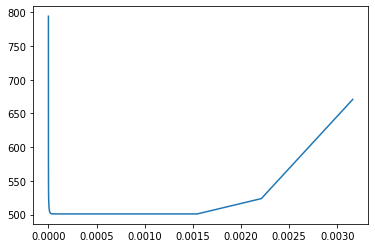

In [520]:
e1 = cross_validation_demo(y[0:1000], tX[0:1000])

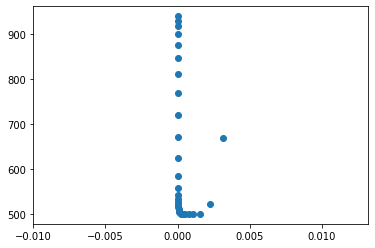

In [519]:
plt.scatter(np.logspace(-7, -2.5, 30),e1)

## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)